In [ ]:
import pandas as pd
trxn = pd.read_csv("/content/Retail_Data_Transactions.csv")
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35.0
1,CS4768,15-Mar-15,39.0
2,CS2122,26-Feb-13,52.0
3,CS1217,16-Nov-11,99.0
4,CS1850,20-Nov-13,78.0
...,...,...,...
49724,CS1227,10-Apr-13,103.0
49725,CS4287,14-Dec-13,51.0
49726,CS2758,31-Aug-14,73.0
49727,CS3182,26-Jun-13,71.0


In [ ]:
response=pd.read_csv("/content/Retail_Data_Response.csv")
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [ ]:
df=trxn.merge(response,on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35.0,1
1,CS4768,15-Mar-15,39.0,1
2,CS2122,26-Feb-13,52.0,0
3,CS1217,16-Nov-11,99.0,0
4,CS1850,20-Nov-13,78.0,0
...,...,...,...,...
49724,CS1227,10-Apr-13,103.0,0
49725,CS4287,14-Dec-13,51.0,0
49726,CS2758,31-Aug-14,73.0,0
49727,CS3182,26-Jun-13,71.0,0


In [ ]:
#features
df.dtypes
df.shape

(49729, 4)

In [ ]:
df.describe()

,tran_amount,response
count,49728.000000,49729.000000
mean,70.083736,0.129401
std,20.502866,0.335647
min,35.000000,0.000000
25%,52.000000,0.000000
50%,70.000000,0.000000
75%,88.000000,0.000000
max,105.000000,1.000000


In [ ]:
df.isnull().sum()

customer_id    0
trans_date     0
tran_amount    1
response       0
dtype: int64

In [ ]:
df.dropna()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35.0,1
1,CS4768,15-Mar-15,39.0,1
2,CS2122,26-Feb-13,52.0,0
3,CS1217,16-Nov-11,99.0,0
4,CS1850,20-Nov-13,78.0,0
...,...,...,...,...
49723,CS3394,28-Dec-14,78.0,0
49724,CS1227,10-Apr-13,103.0,0
49725,CS4287,14-Dec-13,51.0,0
49726,CS2758,31-Aug-14,73.0,0


In [ ]:
#change datatypes
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response'] = df['response'].astype('Int64')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35.0,1
1,CS4768,2015-03-15,39.0,1
2,CS2122,2013-02-26,52.0,0
3,CS1217,2011-11-16,99.0,0
4,CS1850,2013-11-20,78.0,0
...,...,...,...,...
49724,CS1227,2013-04-10,103.0,0
49725,CS4287,2013-12-14,51.0,0
49726,CS2758,2014-08-31,73.0,0
49727,CS3182,2013-06-26,71.0,0


In [ ]:
#check for outliers
#z-score
from scipy import stats
import numpy as np
#calz score
z_scores=np.abs(stats.zscore(df['tran_amount']))
#set a threshold
threshold=3
outliers=z_scores>threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


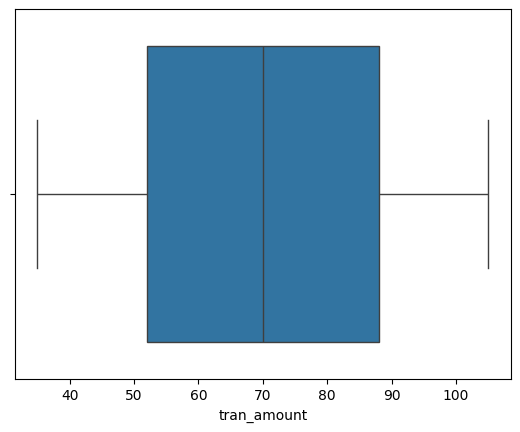

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [ ]:
#creating new columns
df['month']=df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35.0,1,2.0
1,CS4768,2015-03-15,39.0,1,3.0
2,CS2122,2013-02-26,52.0,0,2.0
3,CS1217,2011-11-16,99.0,0,11.0
4,CS1850,2013-11-20,78.0,0,11.0
...,...,...,...,...,...
49724,CS1227,2013-04-10,103.0,0,4.0
49725,CS4287,2013-12-14,51.0,0,12.0
49726,CS2758,2014-08-31,73.0,0,8.0
49727,CS3182,2013-06-26,71.0,0,6.0


In [ ]:
#which 3 months have had highest transaction amount?
monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,1.0,313978.0
1,10.0,312430.0
2,7.0,311462.0


In [ ]:
#customers having highest num of orders
customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts
top_5_customers= customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_customers

,customer_id,count
0,CS3013,25
1,CS2657,23
2,CS4303,22
3,CS1969,22
4,CS4424,21


<Axes: xlabel='customer_id', ylabel='count'>

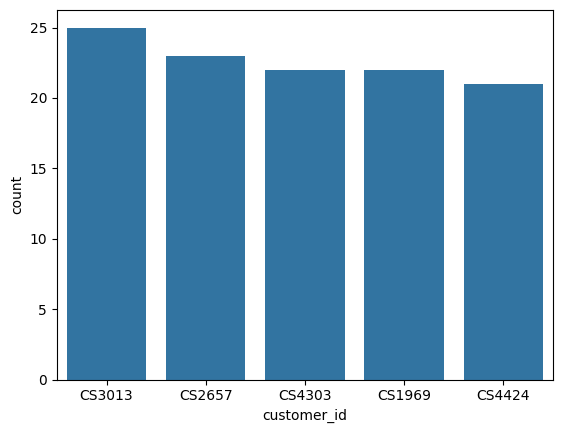

In [ ]:
 sns.barplot(x='customer_id',y='count',data=top_5_customers)

In [ ]:
#customers having highest value of orders
customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales
top_5_sales= customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
1545,CS2657,1799.0
1901,CS3013,1636.0
3191,CS4303,1540.0
3312,CS4424,1510.0
4338,CS5450,1500.0


<Axes: xlabel='customer_id', ylabel='tran_amount'>

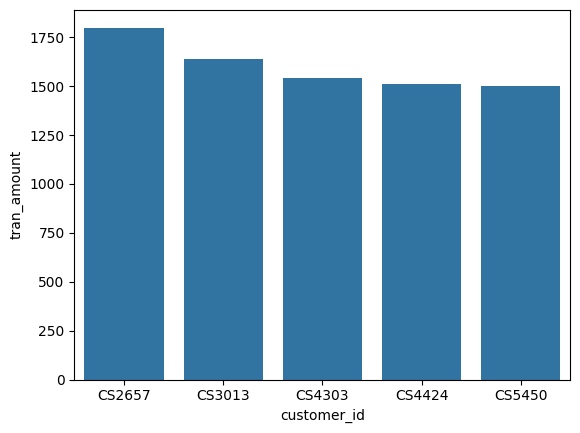

In [ ]:
 sns.barplot(x='customer_id',y='tran_amount',data=top_5_sales)

**Time Series Analysis**

AttributeError: module 'matplotlib.pyplot' has no attribute 'gce'

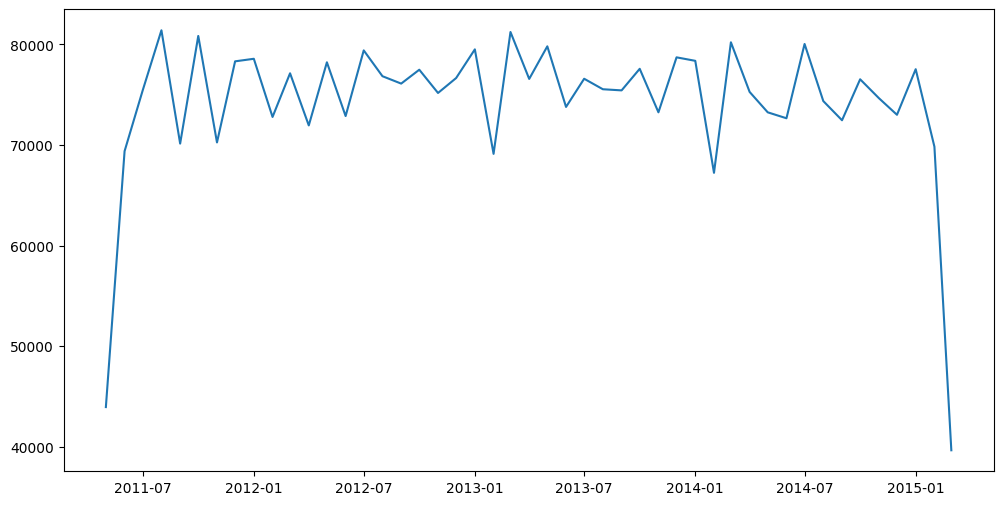

In [ ]:
df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index =monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)
plt.gce().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))
plt.gce().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly_sales')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

**Cohort Segmentation**

In [ ]:
#Recency
recency=df.groupby('customer_id')['trans_date'].max()
#frequency
frequency=df.groupby('customer_id')['trans_date'].count()
#Recency
monetary = df.groupby('customer_id')['tran_amount'].sum()
#Combine
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,7,419.0
CS1113,2015-02-09,11,818.0
CS1114,2015-02-12,8,673.0
CS1115,2014-04-09,12,926.0
CS1116,2014-08-25,7,489.0
...,...,...,...
CS6107,2015-01-03,9,720.0
CS6108,2014-11-07,10,632.0
CS6109,2013-11-01,12,825.0


In [ ]:
#Customer Segmentation
def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [ ]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,7,419.0,P2
CS1113,2015-02-09,11,818.0,P2
CS1114,2015-02-12,8,673.0,P2
CS1115,2014-04-09,12,926.0,P2
CS1116,2014-08-25,7,489.0,P2
...,...,...,...,...
CS6107,2015-01-03,9,720.0,P2
CS6108,2014-11-07,10,632.0,P2
CS6109,2013-11-01,12,825.0,P2


In [ ]:
set(rfm['Segment'])

{'P0', 'P2'}

**Churn Analysis**

<Axes: xlabel='response'>

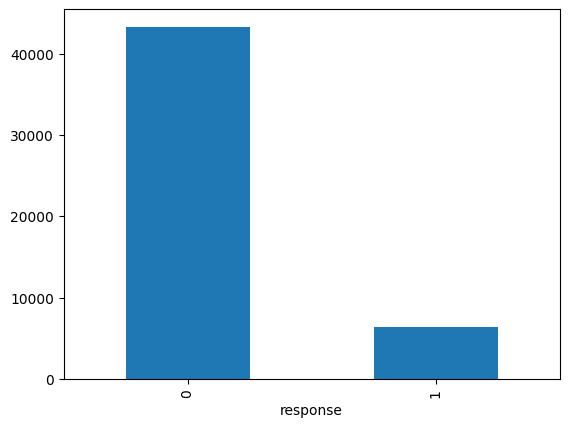

In [ ]:
# Count the number of churned and active customers
churn_counts = df['response'].value_counts()

# Plot
churn_counts.plot(kind='bar')


**Analyzing top customers**

<Axes: xlabel='month_year'>

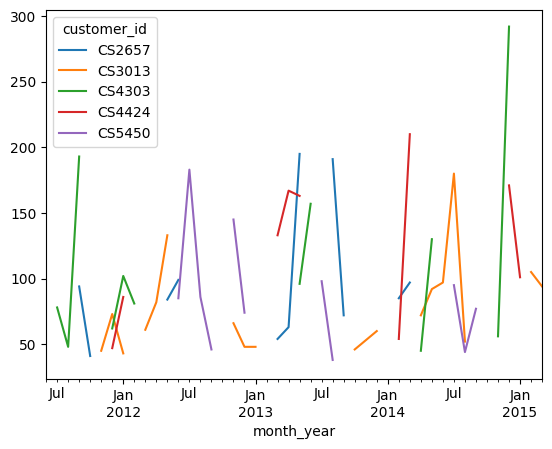

In [ ]:
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')


In [ ]:
import pandas as pd
from google.colab import files
df.to_csv('MainData.csv', index=False)
files.download('MainData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files
rfm.to_csv('AddAnlys.csv', index=False)
files.download('AddAnlys.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

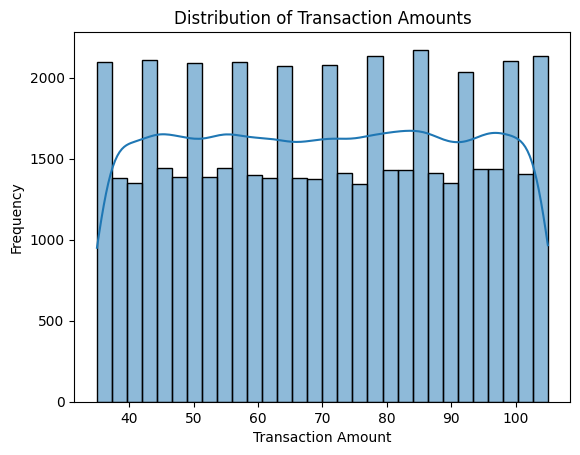

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Transaction Amounts

sns.histplot(df['tran_amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


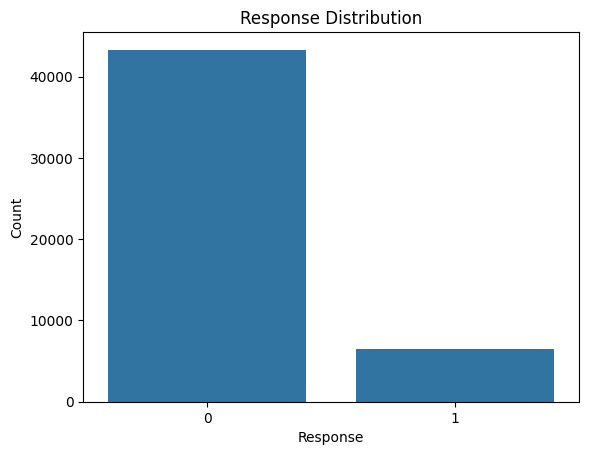

In [ ]:
# Response Distribution
sns.countplot(x='response', data=df)
plt.title('Response Distribution')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


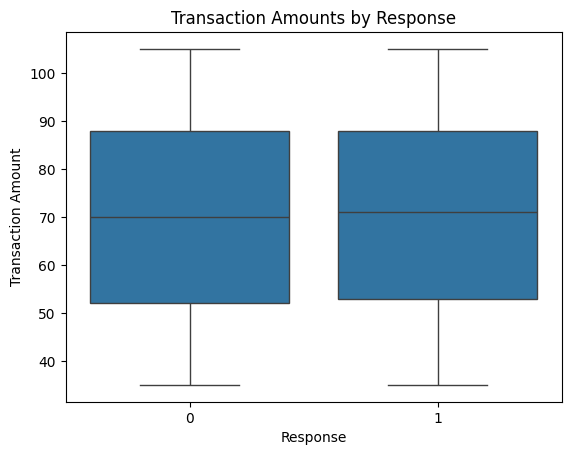

In [ ]:
# Transaction Amounts by Response
sns.boxplot(x='response', y='tran_amount', data=df)
plt.title('Transaction Amounts by Response')
plt.xlabel('Response')
plt.ylabel('Transaction Amount')
plt.show()


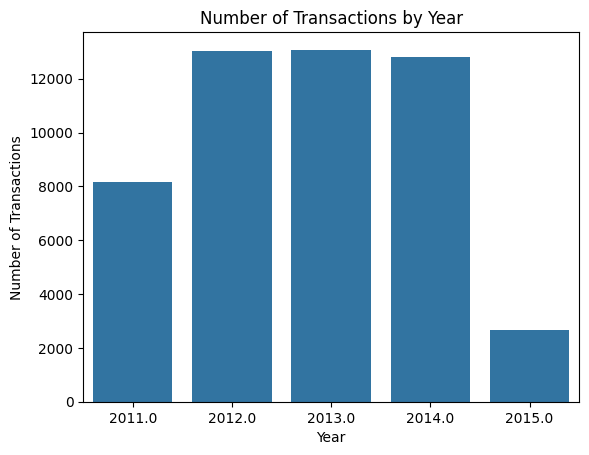

In [ ]:
# Transactions Over Time by Year
df['year'] = df['trans_date'].dt.year
sns.countplot(x='year', data=df)
plt.title('Number of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()


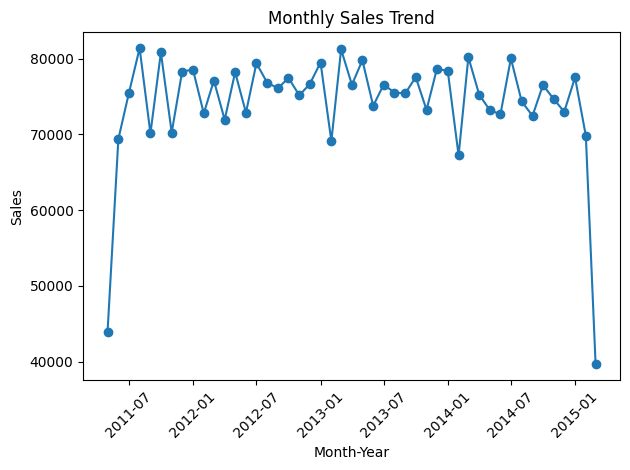

In [ ]:
# Adding a month-year column
df['month_year'] = df['trans_date'].dt.to_period('M')

# Grouping by month-year to get the sum of transaction amounts
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plotting monthly sales trend
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


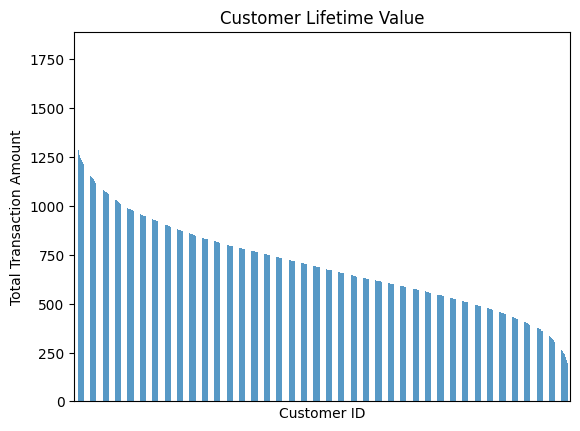

In [ ]:
# Customer Lifetime Value
customer_ltv = df.groupby('customer_id')['tran_amount'].sum().sort_values(ascending=False)

# Plotting Customer Lifetime Value
customer_ltv.plot(kind='bar', alpha=0.75)
plt.title('Customer Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Amount')
plt.xticks([])
plt.show()


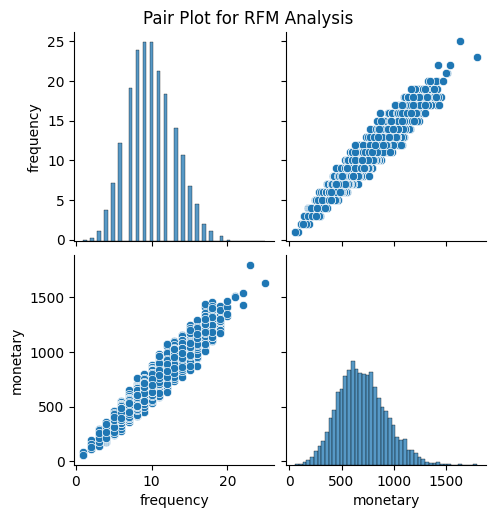

In [ ]:
# Plotting pair plot
sns.pairplot(rfm)
plt.suptitle('Pair Plot for RFM Analysis', y=1.02)
plt.show()


<ipython-input-63-a177acc6a9b3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=rfm, palette='viridis')


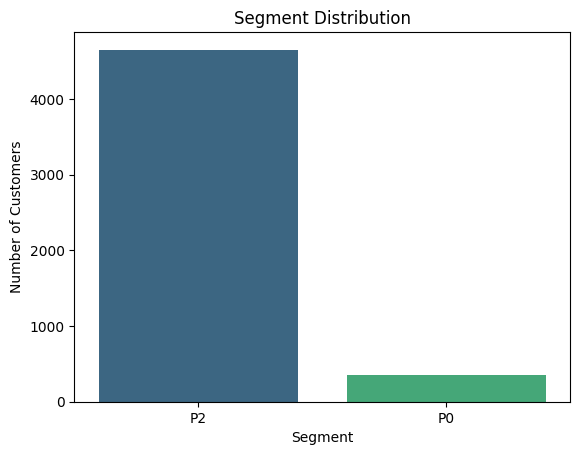

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Segment Distribution
sns.countplot(x='Segment', data=rfm, palette='viridis')
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()


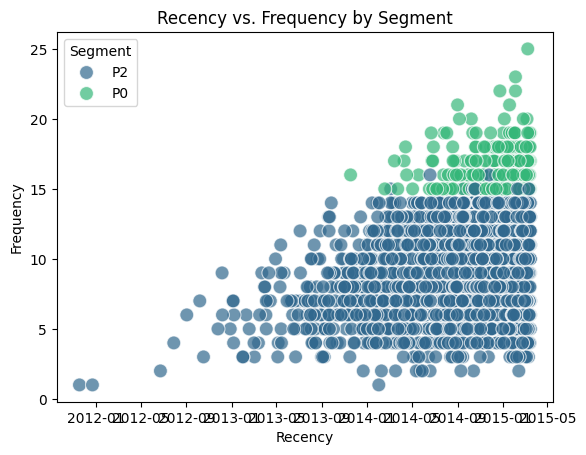

In [ ]:
# Recency vs. Frequency
sns.scatterplot(x='recency', y='frequency', hue='Segment', data=rfm, palette='viridis', s=100, alpha=0.7)
plt.title('Recency vs. Frequency by Segment')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.show()


<ipython-input-65-636e636098cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='monetary', data=rfm, palette='viridis')


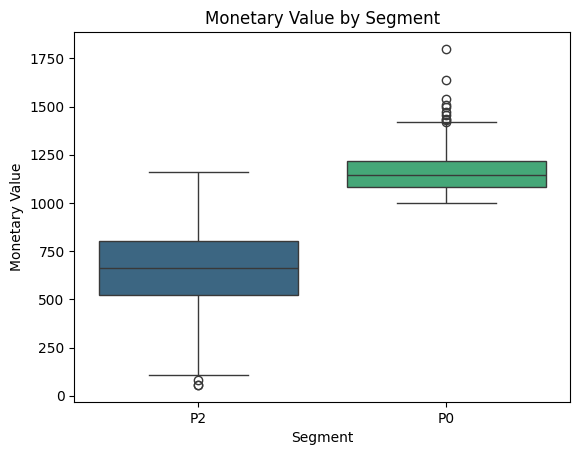

In [ ]:
# Monetary Value by Segment
sns.boxplot(x='Segment', y='monetary', data=rfm, palette='viridis')
plt.title('Monetary Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Monetary Value')
plt.show()


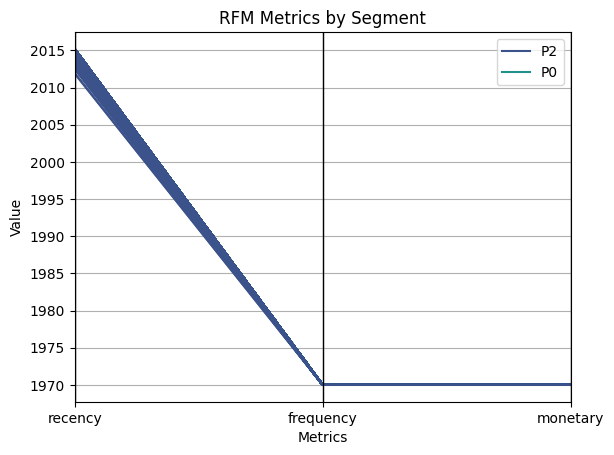

In [ ]:
from pandas.plotting import parallel_coordinates

# Parallel Coordinates Plot
parallel_coordinates(rfm.reset_index(), class_column='Segment', cols=['recency', 'frequency', 'monetary'], color=sns.color_palette('viridis', n_colors=3))
plt.title('RFM Metrics by Segment')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()
